### Creating the blended sample
By Shooby, Sep 16th <br>
last edited: Sep 16th

In [5]:
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import astropy.wcs as wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import ndimage
from PIL import Image


def radec2xy(ra,dec,wc):
    coords = SkyCoord(ra,dec, unit='deg')
    a=wcs.utils.skycoord_to_pixel(coords, wc, origin=0,mode=u'wcs')
    return a[0],a[1]
    
def cut(ra,dec,andaze,filename):
    '''gets coordinates of the galaxy and the filter to return a cutout
    (also called a postage stamp) of the galaxy with given size'''
    hdr = pyfits.getheader(filename)
    w = wcs.WCS(hdr)
    x,y=radec2xy(ra,dec,w)
    x,y=np.int(x),np.int(y)
    im=pyfits.getdata(filename)[y-andaze:y+andaze,x-andaze:x+andaze]
    return im

%matplotlib inline

In [231]:
gs = pyfits.getdata('../../WFIRST_WPS/CANDELS_fits/gds.fits')
sel1 = (gs['zbest']>0.1)&(gs['zbest']<3.0)&(gs['CLASS_STAR']<0.9)&(gs['Hmag']<26.)
ra, dec = gs['RA_1'][sel1],gs['DEC_1'][sel1]

(64, 64)


NameError: name 'stop' is not defined

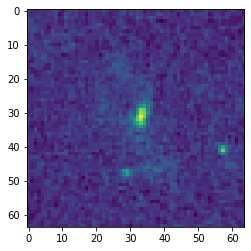

In [256]:
im = np.zeros([64,64])
for boz in range(3000):
    n = np.int(np.random.uniform(0,len(ra)-1))
    delta_ra,delta_dec = 0.0001*np.random.normal(0,1),0.0001*np.random.normal(0,1)    
    data = cut(ra[n]+delta_ra,dec[n]+delta_dec,40,'/Users/shemmati/Desktop/GOODS/goodss_all_acs_wfc_f606w_060mas_v1.5_drz.fits')
    if data[0,0]!=0 :
        angle = np.random.uniform(0,80)
        s = ndimage.rotate(data,angle,mode='nearest',reshape=False)
        da1 = s[8:-8,8:-8]
        
    n = np.int(np.random.uniform(0,len(ra)-1))
    delta_ra,delta_dec = 0.00001*np.random.normal(0,1),0.00001*np.random.normal(0,1)
    data = cut(ra[n]+delta_ra,dec[n]+delta_dec,40,'/Users/shemmati/Desktop/GOODS/goodss_all_acs_wfc_f606w_060mas_v1.5_drz.fits')
    if data[0,0]!=0 :
        angle = np.random.uniform(0,80)
        s = ndimage.rotate(data,angle,mode='nearest',reshape=False)
        da2 = s[8:-8,8:-8]

    
    da = np.arcsinh(da1+da2)
    rescaled = (255.0 / (da.max()+0.1) * (da - da.min())).astype(np.uint8)
    im = Image.fromarray(rescaled)
        
    plt.imshow(rescaled)
    print(rescaled.shape)
    stop